In [1]:
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import shap 
import numpy as np

# Import datasets

In [2]:
csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31G_X_TRAIN.csv")
G_X_train = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31B_X_TRAIN.csv")
B_X_train = pd.read_csv(csv_path)

# ET_G

In [3]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31G_ET_CALIBRATED.pkl")
G_ET_CALIBRATED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31G_ET_CALIBRATED_selected.pkl")
G_ET_CALIBRATED_selected = joblib.load(pkl_path)

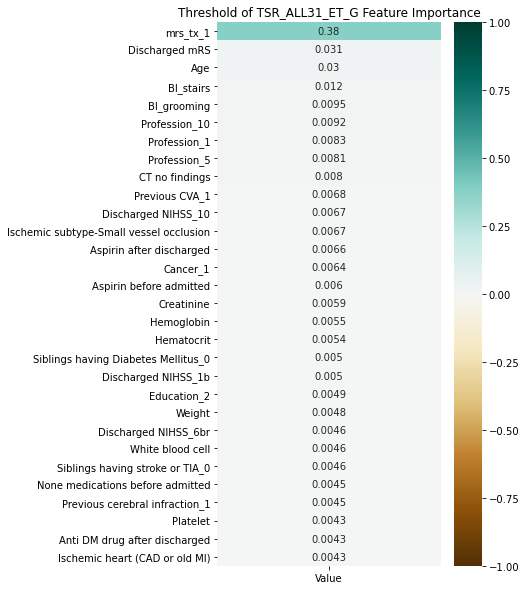

In [4]:
etG_fi = G_ET_CALIBRATED.base_estimator._final_estimator.feature_importances_
etG_fi_df = pd.DataFrame(etG_fi)
etG_fi_df.index = G_X_train.columns
etG_fi_df.columns = (["Value"])
etG_fi_plot = etG_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(etG_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL31_ET_G Feature Importance')
#plt.savefig('PLOT/TSR_ALL31/FI_G31_ET.png')
plt.show()

In [5]:
G_X_train_selected = G_X_train[etG_fi_plot.index]

etG_fi_s = G_ET_CALIBRATED_selected.base_estimator._final_estimator.feature_importances_
etG_fi_s_df = pd.DataFrame(etG_fi_s)
etG_fi_s_df.index = G_X_train_selected.columns
etG_fi_s_df.columns = (["Value"])
etG_fi_s_df = etG_fi_s_df.sort_values(["Value"], ascending=False)

100%|===================| 26410/26516 [04:03<00:00]        

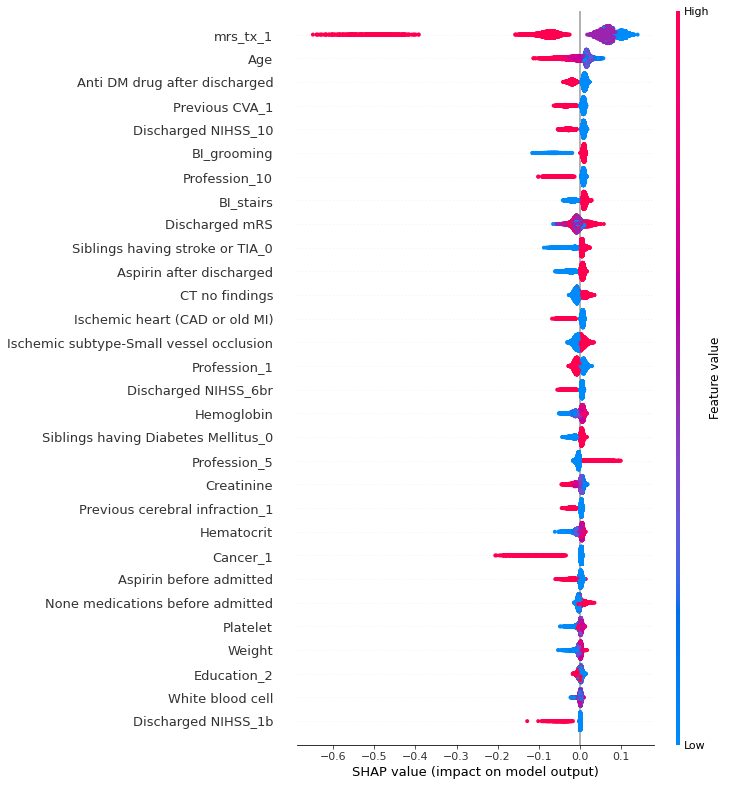

In [6]:
etG31_shap_values = shap.TreeExplainer(G_ET_CALIBRATED_selected.base_estimator._final_estimator, G_X_train_selected).shap_values(G_X_train_selected)
shap.summary_plot(etG31_shap_values[1], G_X_train_selected, max_display=30)

# XGBC_G

In [7]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31G_XGBC_CALIBRATED.pkl")
G_XGBC_CALIBRATED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31G_XGBC_CALIBRATED_selected.pkl")
G_XGBC_CALIBRATED_selected = joblib.load(pkl_path)

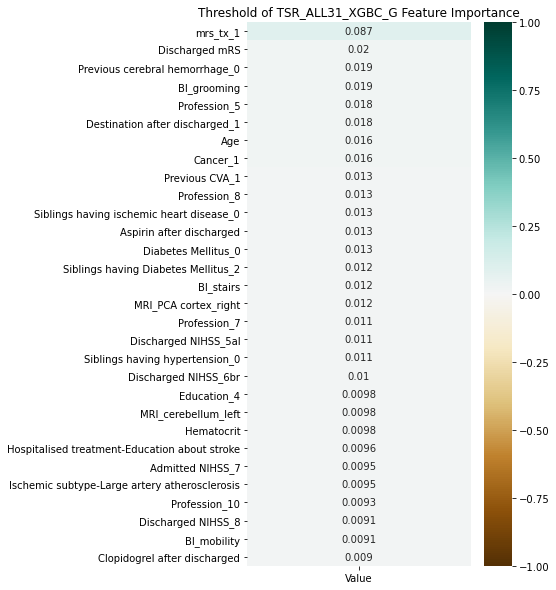

In [8]:
xgbcG_fi = G_XGBC_CALIBRATED.base_estimator._final_estimator.feature_importances_
xgbcG_fi_df = pd.DataFrame(xgbcG_fi)
xgbcG_fi_df.index = G_X_train.columns
xgbcG_fi_df.columns = (["Value"])
xgbcG_fi_plot = xgbcG_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(xgbcG_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL31_XGBC_G Feature Importance')
#plt.savefig('PLOT/TSR_ALL31/FI_G31_XGBC.png')
plt.show()

In [9]:
G_X_train_selected = G_X_train[xgbcG_fi_plot.index]

xgbcG_fi_s = G_XGBC_CALIBRATED_selected.base_estimator._final_estimator.feature_importances_
xgbcG_fi_s_df = pd.DataFrame(xgbcG_fi_s)
xgbcG_fi_s_df.index = G_X_train_selected.columns
xgbcG_fi_s_df.columns = (["Value"])
xgbcG_fi_s_df = xgbcG_fi_s_df.sort_values(["Value"], ascending=False)

 95%|=================== | 12628/13258 [00:19<00:00]       

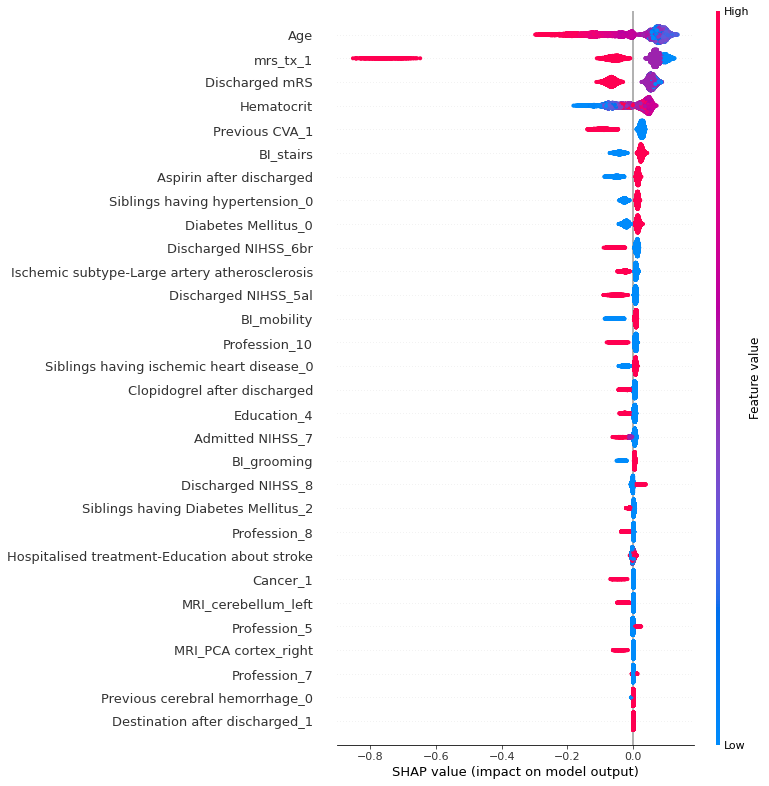

In [10]:
xgbcG31_shap_values = shap.TreeExplainer(G_XGBC_CALIBRATED_selected.base_estimator._final_estimator, G_X_train_selected).shap_values(G_X_train_selected)
shap.summary_plot(xgbcG31_shap_values, G_X_train_selected, max_display=30)

# ET_B

In [11]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31B_ET_CALIBRATED.pkl")
B_ET_CALIBRATED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31B_ET_CALIBRATED_selected.pkl")
B_ET_CALIBRATED_selected = joblib.load(pkl_path)

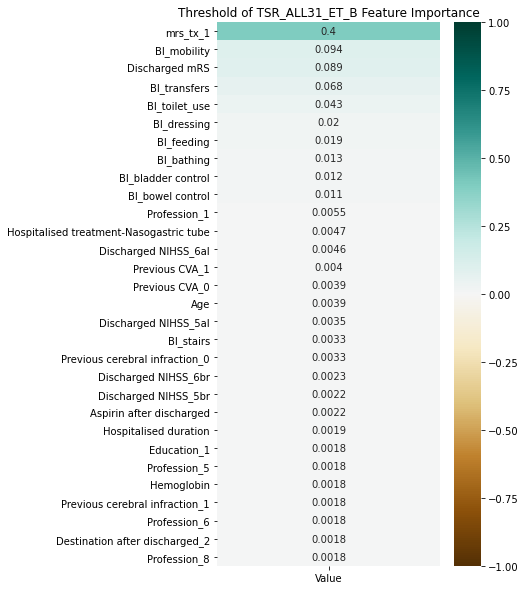

In [12]:
etB_fi = B_ET_CALIBRATED.base_estimator._final_estimator.feature_importances_
etB_fi_df = pd.DataFrame(etB_fi)
etB_fi_df.index = B_X_train.columns
etB_fi_df.columns = (["Value"])
etB_fi_plot = etB_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(etB_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL31_ET_B Feature Importance')
#plt.savefig('PLOT/TSR_ALL31/FI_B31_ET.png')
plt.show()

In [13]:
B_X_train_selected = B_X_train[etB_fi_plot.index]

etB_fi_s = B_ET_CALIBRATED_selected.base_estimator._final_estimator.feature_importances_
etB_fi_s_df = pd.DataFrame(etB_fi_s)
etB_fi_s_df.index = B_X_train_selected.columns
etB_fi_s_df.columns = (["Value"])
etB_fi_s_df = etB_fi_s_df.sort_values(["Value"], ascending=False)

100%|===================| 29267/29316 [07:29<00:00]        

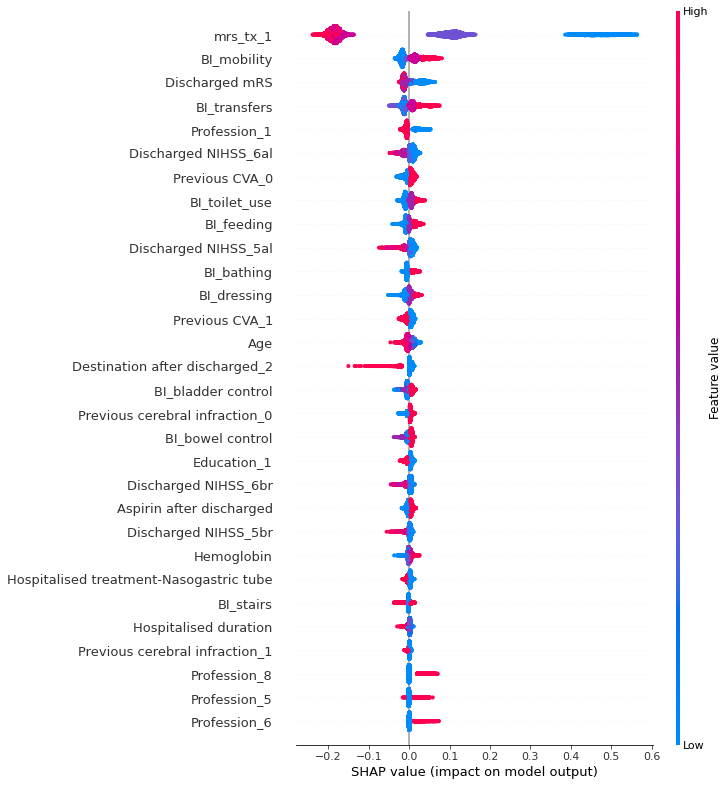

In [14]:
etB31_shap_values = shap.TreeExplainer(B_ET_CALIBRATED_selected.base_estimator._final_estimator, B_X_train_selected).shap_values(B_X_train_selected)
shap.summary_plot(etB31_shap_values[1], B_X_train_selected, max_display=30)

# XGBC_B

In [15]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31B_XGBC_CALIBRATED.pkl")
B_XGBC_CALIBRATED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31B_XGBC_CALIBRATED_selected.pkl")
B_XGBC_CALIBRATED_selected = joblib.load(pkl_path)

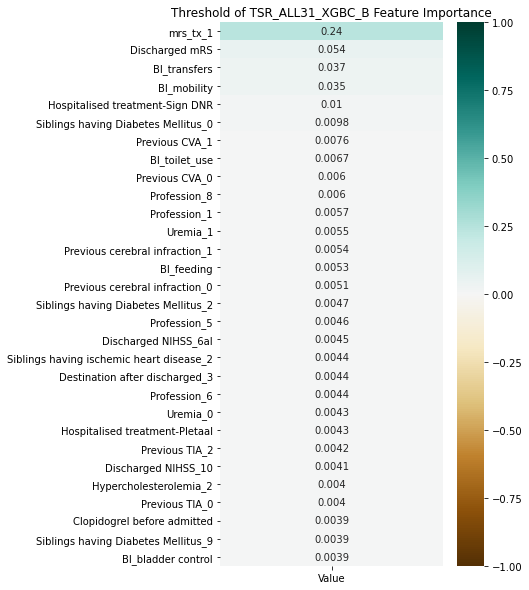

In [16]:
xgbcB_fi = B_XGBC_CALIBRATED.base_estimator._final_estimator.feature_importances_
xgbcB_fi_df = pd.DataFrame(xgbcB_fi)
xgbcB_fi_df.index = B_X_train.columns
xgbcB_fi_df.columns = (["Value"])
xgbcB_fi_plot = xgbcB_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(xgbcB_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL31_XGBC_B Feature Importance')
#plt.savefig('PLOT/TSR_ALL31/FI_B31_XGBC.png')
plt.show()

In [17]:
B_X_train_selected = B_X_train[xgbcB_fi_plot.index]

xgbcB_fi_s = B_XGBC_CALIBRATED_selected.base_estimator._final_estimator.feature_importances_
xgbcB_fi_s_df = pd.DataFrame(xgbcB_fi_s)
xgbcB_fi_s_df.index = B_X_train_selected.columns
xgbcB_fi_s_df.columns = (["Value"])
xgbcB_fi_s_df = xgbcB_fi_s_df.sort_values(["Value"], ascending=False)

 98%|===================| 14322/14658 [00:11<00:00]       

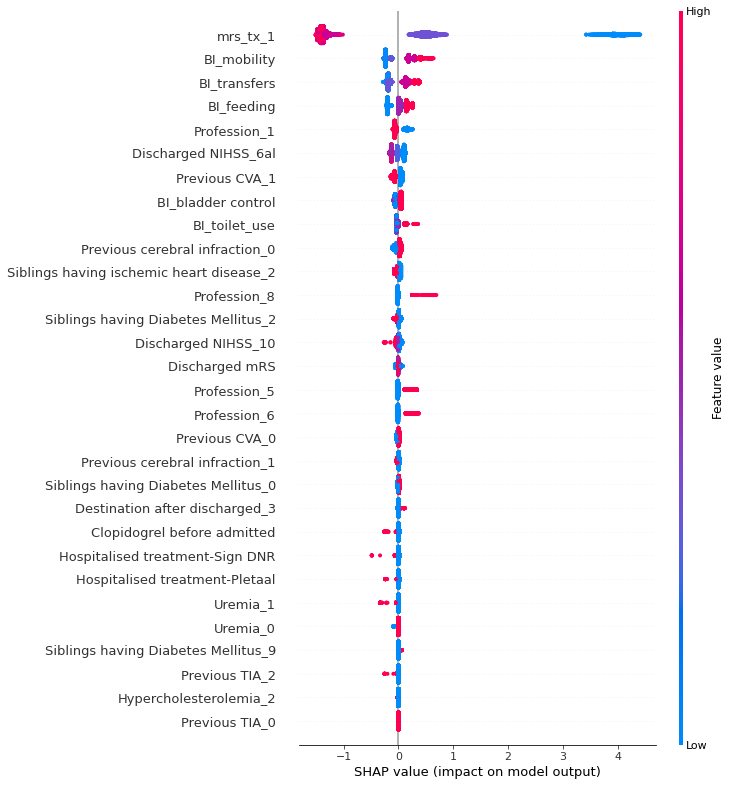

In [18]:
xgbcB31_shap_values = shap.TreeExplainer(B_XGBC_CALIBRATED_selected.base_estimator._final_estimator, B_X_train_selected).shap_values(B_X_train_selected)
shap.summary_plot(xgbcB31_shap_values, B_X_train_selected, max_display=30)

In [19]:
a = pd.DataFrame(etG_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(etG31_shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(G_X_train_selected.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_etG31_index","model_etG31_value","shap_etG31_index","shap_etG31_value"]
csv_path = os.path.join("INFO", "TSR_ALL31", "etG31_FI.csv")
c.to_csv(csv_path)

In [20]:
a = pd.DataFrame(xgbcG_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(xgbcG31_shap_values)
feature_importance = pd.DataFrame(list(zip(G_X_train_selected.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_xgbcG31_index","model_xgbcG31_value","shap_xgbcG31_index","shap_xgbcG31_value"]
csv_path = os.path.join("INFO", "TSR_ALL31", "xgbcG31_FI.csv")
c.to_csv(csv_path)

In [21]:
a = pd.DataFrame(etB_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(etB31_shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(B_X_train_selected.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_etB31_index","model_etB31_value","shap_etB31_index","shap_etB31_value"]
csv_path = os.path.join("INFO", "TSR_ALL31", "etB31_FI.csv")
c.to_csv(csv_path)

In [22]:
a = pd.DataFrame(xgbcB_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(xgbcB31_shap_values)
feature_importance = pd.DataFrame(list(zip(B_X_train_selected.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_xgbcB31_index","model_xgbcB31_value","shap_xgbcB31_index","shap_xgbcB31_value"]
csv_path = os.path.join("INFO", "TSR_ALL31", "xgbcB31_FI.csv")
c.to_csv(csv_path)

In [24]:
G31 = set(etB_fi_plot.index) & set(xgbcG_fi_plot.index)
B31 = set(etB_fi_plot.index) & set(xgbcB_fi_plot.index)

threshold_and = pd.DataFrame([G31, B31]).T
threshold_and.index = threshold_and.index+1
threshold_and[threshold_and.isnull()] = ""
threshold_and.columns = ["G31", "B31"]

csv_save = os.path.join("INFO", "TSR_ALL31", "Threshold_Intersection_31.csv")
threshold_and.to_csv(csv_save, index=True)